In [11]:
#Load the dataset
import pandas as pd
df=pd.read_csv('vgsales.csv')
df.head(10)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [12]:
df.shape

(16598, 11)

In [16]:
df.describe()
### we can see some of records are missing in year column. So we have to clean up our data sets which is part of data preprocessing.
## now How we can deal with this missing year:
## impute default value, average value or we can remove records missing year column.

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [20]:
music_data=pd.read_csv('music.csv')
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


#### For machine learning model: split the dataset into two set, input and output set. the first two column (age, gender)-input and last column (genre)- output set. the reason behind for example, for user age 20 and is a male like hiphop and similarly others. after train our model we can predict for users age 21, what is the genre of music that the user probably like.

In [58]:
X= music_data.drop(columns=['genre'])# input data
y= music_data['genre']# output data
## so we prepare our data for further model building

In [68]:
## scikit-learn is popular machine learning library for machine learning, in this library sklearn is package having module tree with a class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X,y)
predictions=model.predict([[21, 1], [22,0]])
predictions

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)
model= DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)

score=accuracy_score(y_test, predictions)
score


1.0

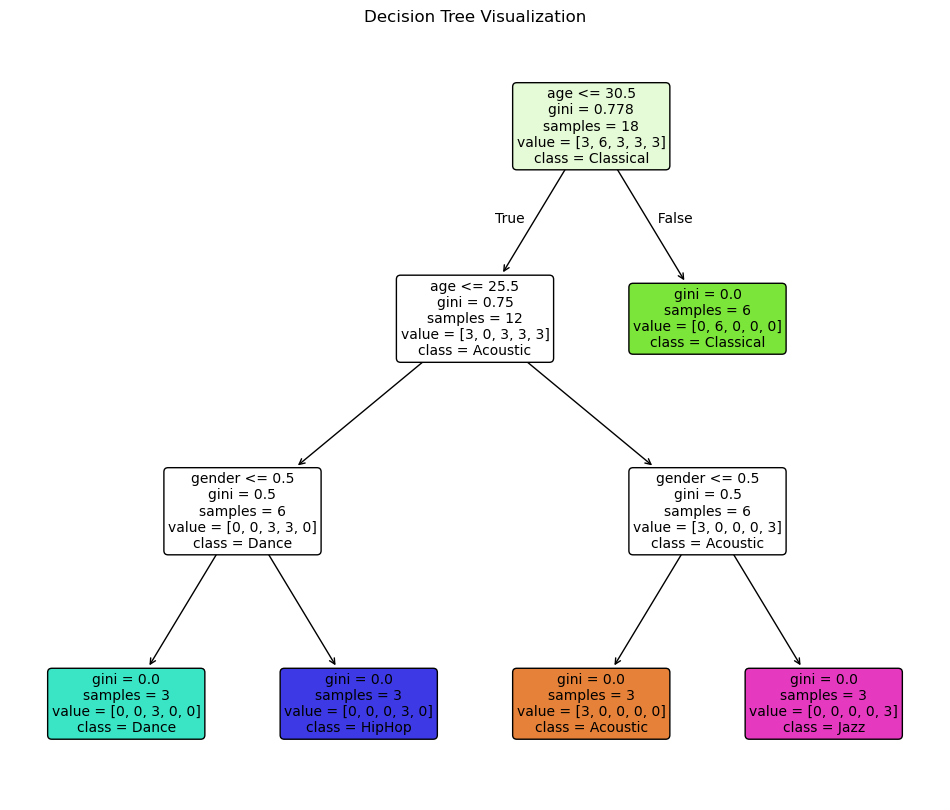

In [69]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(12, 10))
plot_tree(
    model,
    feature_names=['age', 'gender'],
    class_names=sorted(y.unique()),
    filled=True,
    label='all',
    fontsize=10,
    max_depth= 3,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()
